In [37]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

mean_class_1, std_class_1 = 0, 1  
mean_class_2, std_class_2 = 1, 1  
prior_class_1 = 2 / 3  
prior_class_2 = 1 / 3  
cost_matrix = np.array([[0, 2], [1, 0]])

x_values = np.linspace(-3, 4, 1000)
pdf_class_1 = norm.pdf(x_values, mean_class_1, std_class_1)  
pdf_class_2 = norm.pdf(x_values, mean_class_2, std_class_2)  

In [38]:

def compute_decision_boundaries():
    boundary_MAP = (mean_class_1 + mean_class_2) / 2 + np.log(prior_class_1 / prior_class_2) / (mean_class_2 - mean_class_1)
    boundary_Bayesian = (mean_class_1 + mean_class_2) / 2 + np.log((prior_class_1 * cost_matrix[1, 0]) / (prior_class_2 * cost_matrix[0, 1])) / (mean_class_2 - mean_class_1)
    return boundary_MAP, boundary_Bayesian

decision_boundary_MAP, decision_boundary_Bayesian = compute_decision_boundaries()
print(f"MAP Decision Boundary: {decision_boundary_MAP}")
print(f"Bayesian Decision Boundary: {decision_boundary_Bayesian}")

MAP Decision Boundary: 1.1931471805599454
Bayesian Decision Boundary: 0.5


In [39]:

def calculate_error_rates(decision_boundary):
    FAR = 1 - norm.cdf(decision_boundary, mean_class_2, std_class_2)
    FNR = norm.cdf(decision_boundary, mean_class_1, std_class_1)
    total_error = FAR * prior_class_2 + FNR * prior_class_1
    return FAR, FNR, total_error

FAR_MAP, FNR_MAP, total_error_MAP = calculate_error_rates(decision_boundary_MAP)
FAR_Bayesian, FNR_Bayesian, total_error_Bayesian = calculate_error_rates(decision_boundary_Bayesian)


print(f"\nFAR (False Alarm Rate) - MAP: {FAR_MAP}")
print(f"FNR (False Negative Rate) - MAP: {FNR_MAP}")
print(f"Total Error - MAP: {total_error_MAP}")
print(f"\nFAR (False Alarm Rate) - Bayesian: {FAR_Bayesian}")
print(f"FNR (False Negative Rate) - Bayesian: {FNR_Bayesian}")
print(f"Total Error - Bayesian: {total_error_Bayesian}")


FAR (False Alarm Rate) - MAP: 0.4234218517607551
FNR (False Negative Rate) - MAP: 0.8835941317380016
Total Error - MAP: 0.730203371745586

FAR (False Alarm Rate) - Bayesian: 0.6914624612740131
FNR (False Negative Rate) - Bayesian: 0.6914624612740131
Total Error - Bayesian: 0.6914624612740131


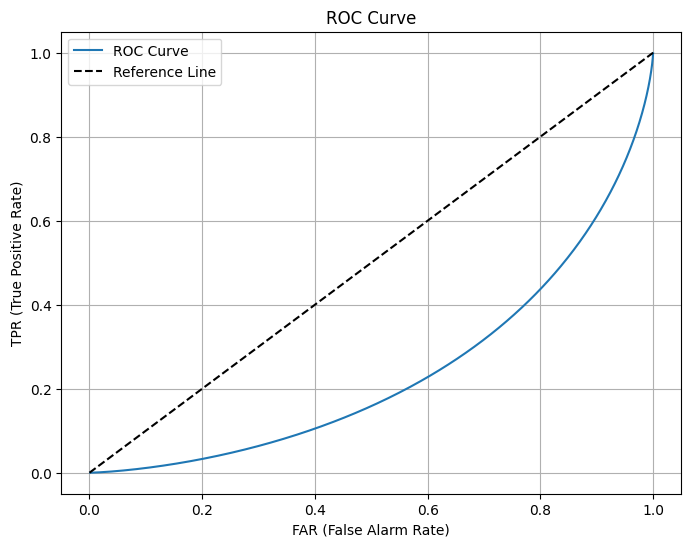

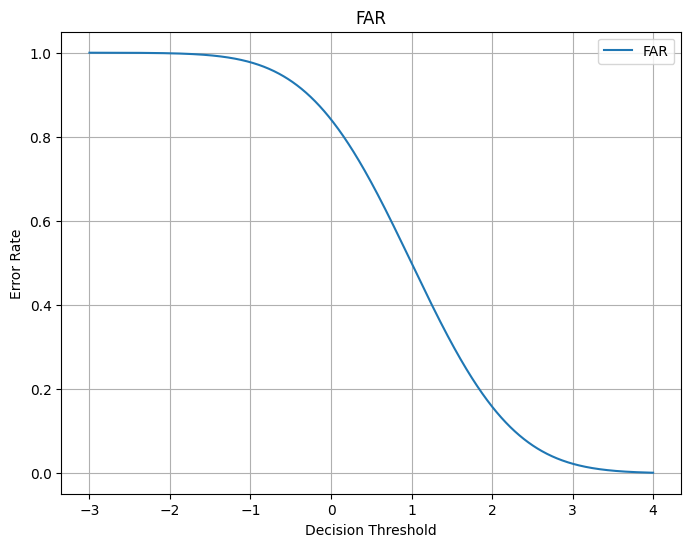

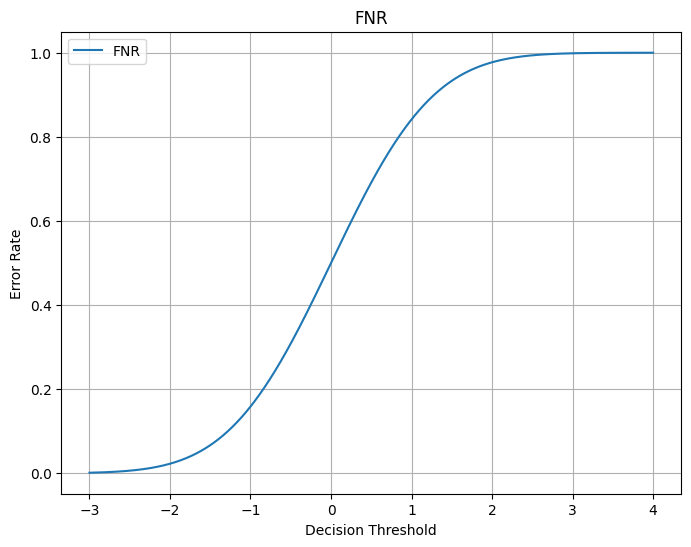

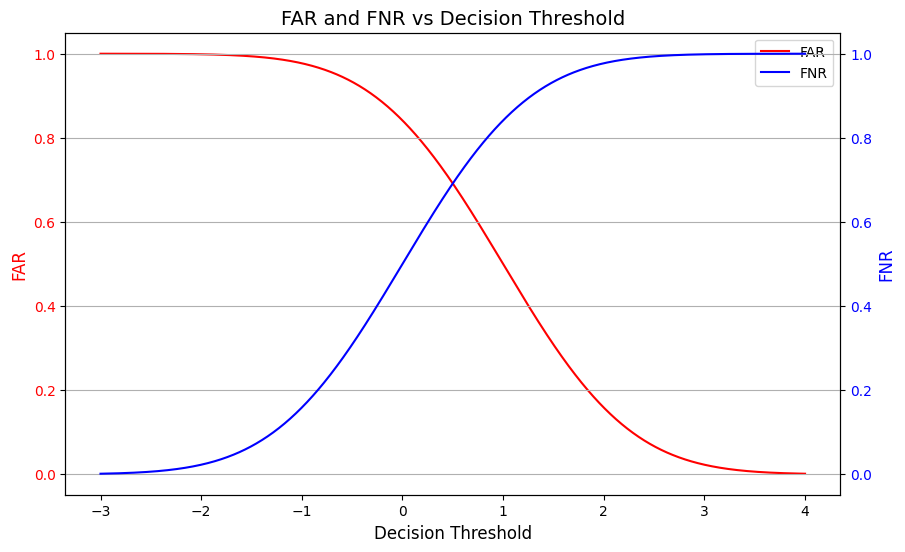

In [40]:
def plot_roc_curve():
    thresholds = np.linspace(-3, 4, 1000)
    FAR_values, TPR_values = [], []
    for threshold in thresholds:
        FAR, FNR, _ = calculate_error_rates(threshold)
        FAR_values.append(FAR)
        TPR_values.append(1 - FNR) 
    
    plt.figure(figsize=(8, 6))
    plt.plot(FAR_values, TPR_values, label='ROC Curve')
    plt.plot([0, 1], [0, 1], 'k--', label='Reference Line')
    plt.xlabel('FAR (False Alarm Rate)')
    plt.ylabel('TPR (True Positive Rate)')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_roc_curve()

def plot_far_fnr():
    thresholds = np.linspace(-3, 4, 1000)
    FAR_values, FNR_values = [], []
    for threshold in thresholds:
        FAR, FNR, _ = calculate_error_rates(threshold)
        FAR_values.append(FAR)
        FNR_values.append(FNR)
    
    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, FAR_values, label='FAR')
    plt.xlabel('Decision Threshold')
    plt.ylabel('Error Rate')
    plt.title('FAR')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(8, 6))
    plt.plot(thresholds, FNR_values, label='FNR')
    plt.xlabel('Decision Threshold')
    plt.ylabel('Error Rate')
    plt.title('FNR')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_far_fnr()

def plot_combined_far_fnr():
    thresholds = np.linspace(-3, 4, 1000)
    FAR_values, FNR_values = [], []

    for threshold in thresholds:
        FAR, FNR, _ = calculate_error_rates(threshold)
        FAR_values.append(FAR)
        FNR_values.append(FNR)

    fig, ax1 = plt.subplots(figsize=(10, 6))

    ax1.plot(thresholds, FAR_values, label='FAR', color='red')
    ax1.set_xlabel('Decision Threshold', fontsize=12)
    ax1.set_ylabel('FAR', fontsize=12, color='red')
    ax1.tick_params(axis='y', labelcolor='red')

    ax2 = ax1.twinx()
    ax2.plot(thresholds, FNR_values, label='FNR', color='blue')
    ax2.set_ylabel('FNR', fontsize=12, color='blue')
    ax2.tick_params(axis='y', labelcolor='blue')

    lines_1, labels_1 = ax1.get_legend_handles_labels()
    lines_2, labels_2 = ax2.get_legend_handles_labels()
    ax1.legend(lines_1 + lines_2, labels_1 + labels_2, loc='upper right')

    plt.title('FAR and FNR vs Decision Threshold', fontsize=14)
    plt.grid(True)
    plt.show()

plot_combined_far_fnr()

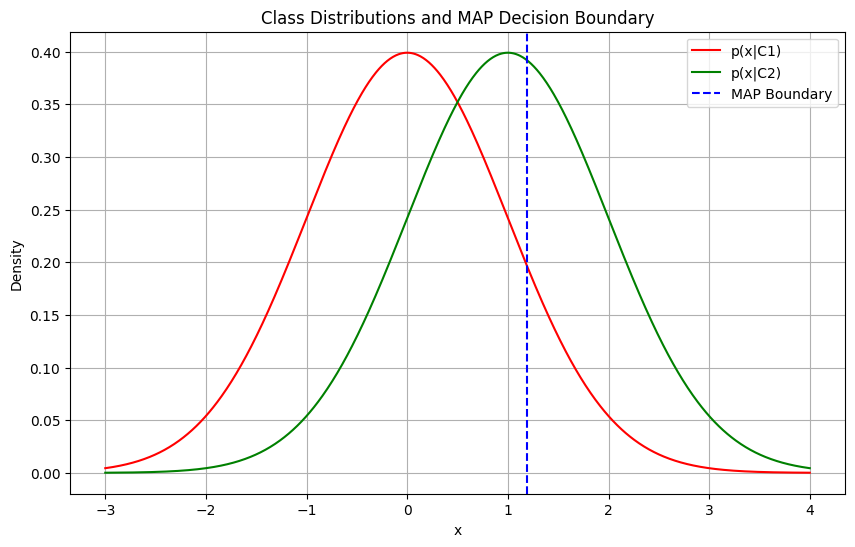

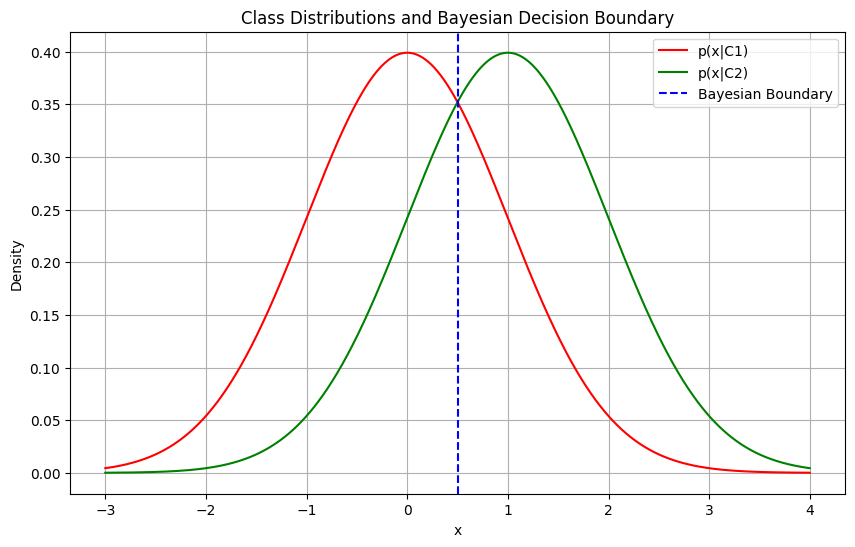

In [24]:

# Class distributions and decision boundaries plot
def plot_class_distributions_and_boundaries():
    plt.figure(figsize=(10, 6))
    plt.plot(x_values, pdf_class_1, 'r', label='p(x|C1)')
    plt.plot(x_values, pdf_class_2, 'g', label='p(x|C2)')
    plt.axvline(decision_boundary_MAP, color='blue', linestyle='--', label='MAP Boundary')
    plt.title('Class Distributions and MAP Decision Boundary')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(x_values, pdf_class_1, 'r', label='p(x|C1)')
    plt.plot(x_values, pdf_class_2, 'g', label='p(x|C2)')
    plt.axvline(decision_boundary_Bayesian, color='blue', linestyle='--', label='Bayesian Boundary')
    plt.title('Class Distributions and Bayesian Decision Boundary')
    plt.xlabel('x')
    plt.ylabel('Density')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_class_distributions_and_boundaries()


Best decision boundary based on minimum error: -0.13373577188472774
Corresponding minimum error: 0.6528697610711915
Corresponding p(C1) value: 0.5148484848484849


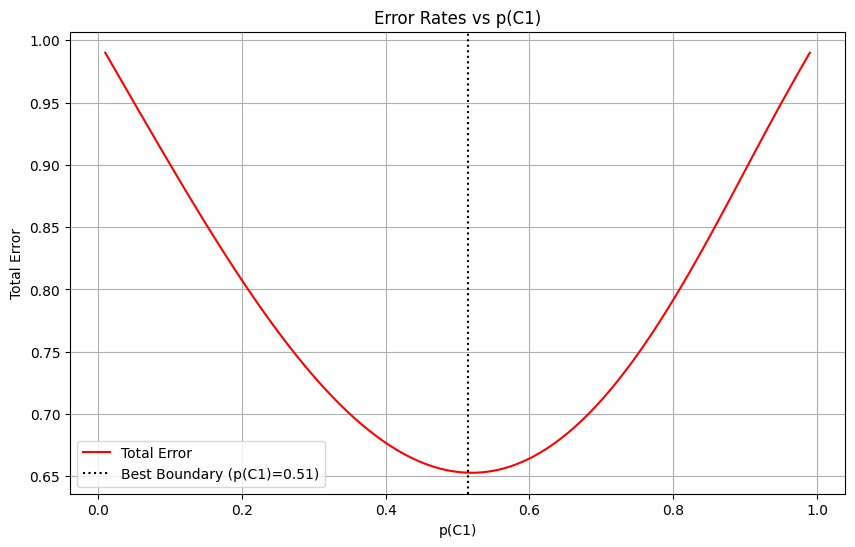

In [41]:
def calculate_error_ratesـPC(decision_boundary, pC1, pC2):
    FAR = 1 - norm.cdf(decision_boundary, mean_class_2, std_class_2)
    FNR = norm.cdf(decision_boundary, mean_class_1, std_class_1)
    total_error = FAR * pC2 + FNR * pC1
    return FAR, FNR, total_error

def calculate_decision_boundary(pC1, pC2):
    boundary_bayesian = (mean_class_1 + mean_class_2) / 2 + np.log((pC1 * cost_matrix[1, 0]) / (pC2 * cost_matrix[0, 1])) / (mean_class_2 - mean_class_1)
    return boundary_bayesian

def find_best_boundary_based_on_pC1():
    pC1_values = np.linspace(0.01, 0.99, 100) 
    min_error_boundaries = []
    min_errors = []
    
    for pC1 in pC1_values:
        pC2 = 1 - pC1
        decision_boundary = calculate_decision_boundary(pC1, pC2)
        
        FAR, FNR, total_error = calculate_error_ratesـPC(decision_boundary, pC1, pC2)
        
        min_error_boundaries.append(decision_boundary)
        min_errors.append(total_error)
    
    min_error_index = np.argmin(min_errors)
    best_boundary = min_error_boundaries[min_error_index]
    best_error = min_errors[min_error_index]
    
    return best_boundary, best_error, pC1_values[min_error_index]

def plot_error_and_best_boundary():
    best_boundary, min_error, best_pC1 = find_best_boundary_based_on_pC1()
    print(f"Best decision boundary based on minimum error: {best_boundary}")
    print(f"Corresponding minimum error: {min_error}")
    print(f"Corresponding p(C1) value: {best_pC1}")
    
    pC1_values = np.linspace(0.01, 0.99, 100)
    total_errors = []
    
    for pC1 in pC1_values:
        pC2 = 1 - pC1
        decision_boundary = calculate_decision_boundary(pC1, pC2)
        _, _, total_error = calculate_error_ratesـPC(decision_boundary, pC1, pC2)
        total_errors.append(total_error)

    plt.figure(figsize=(10, 6))
    plt.plot(pC1_values, total_errors, label='Total Error', color='red')
    plt.axvline(x=best_pC1, color='black', linestyle=':', label=f'Best Boundary (p(C1)={best_pC1:.2f})')
    plt.xlabel('p(C1)')
    plt.ylabel('Total Error')
    plt.title('Error Rates vs p(C1)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_error_and_best_boundary()

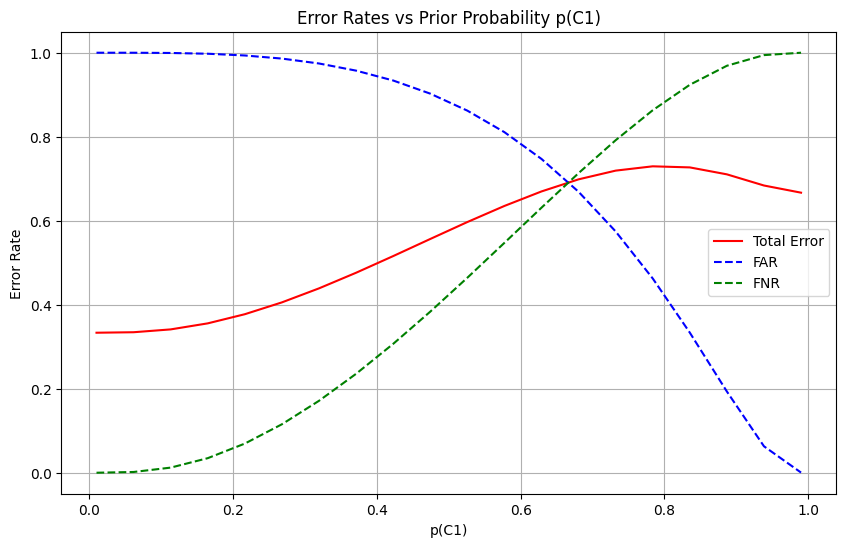

In [42]:
def plot_error_based_on_sensitivity():
    prior_class_1_values = np.linspace(0.01, 0.99, 20)
    total_errors, FAR_values, FNR_values = [], [], []

    for pC1_val in prior_class_1_values:
        pC2_val = 1 - pC1_val
        boundary_bayesian = (mean_class_1 + mean_class_2) / 2 + np.log((pC1_val * cost_matrix[1, 0]) / (pC2_val * cost_matrix[0, 1])) / (mean_class_2 - mean_class_1)
        
        FAR, FNR, total_error = calculate_error_rates(boundary_bayesian)
        total_errors.append(total_error)
        FAR_values.append(FAR)
        FNR_values.append(FNR)

    plt.figure(figsize=(10, 6))
    plt.plot(prior_class_1_values, total_errors, label='Total Error', color='red')
    plt.plot(prior_class_1_values, FAR_values, label='FAR', color='blue', linestyle='--')
    plt.plot(prior_class_1_values, FNR_values, label='FNR', color='green', linestyle='--')
    plt.xlabel('p(C1)')
    plt.ylabel('Error Rate')
    plt.title('Error Rates vs Prior Probability p(C1)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_error_based_on_sensitivity()

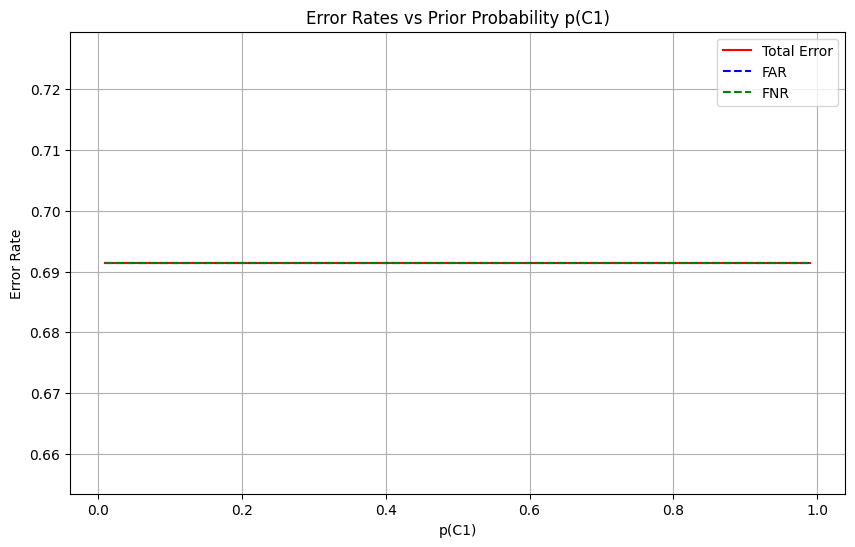

In [43]:

def plot_error_rates(decision_boundary):
    prior_class_1_values = np.linspace(0.01, 0.99, 100)
    total_errors, FAR_values, FNR_values = [], [], []

    for pC1_val in prior_class_1_values:
        pC2_val = 1 - pC1_val
        FAR, FNR, total_error = calculate_error_rates(decision_boundary)
        total_errors.append(total_error)
        FAR_values.append(FAR)
        FNR_values.append(FNR)

    plt.figure(figsize=(10, 6))
    plt.plot(prior_class_1_values, total_errors, label='Total Error', color='red')
    plt.plot(prior_class_1_values, FAR_values, label='FAR', color='blue', linestyle='--')
    plt.plot(prior_class_1_values, FNR_values, label='FNR', color='green', linestyle='--')
    plt.xlabel('p(C1)')
    plt.ylabel('Error Rate')
    plt.title('Error Rates vs Prior Probability p(C1)')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_error_rates(decision_boundary_Bayesian)